## The Robot Vacuum Cleaner
### (a) Model the problem as an MDP, and solve it. 
You work for a firm designing automated vacuum cleaners and have been tasked to beta-test your newest cleaner over the period of 90 days at your home. You live in a square flat that is 36 square meters and will be starting the cleaner each day. The flat is divided into 36 square cells each of surface 1 m2. Your flat is characterized by the fact that provided it was cleaned the previous day, each morning there is new dust distributed over your entire apartment drawn independently (over days) according to some distribution q(·). Each square cell of your flat is either clean, dusty, or very dusty each morning. Hence, the distribution q(·) describes the joint probability that each cell of your flat is clean, dusty, or very dusty each morning.

Each morning, before the robot starts moving, it observes the state of each cell (clean, dusty, or very dusty). Then, the robot decides on a path through your apartment. The choice of the path is constrained by the facts that: 
- (i) the robot always starts in the same position, the bottom left cell of your flat; 
- (ii) it visits every unclean cell; and 
- (iii) it returns to the bottom left at the end of the path. 

The robot can move vertically and horizontally but cannot move diagonally. The robot spends 1 minute on an already clean cell of your flat, 2 minutes on a dusty cell, and 3 minutes on a very dusty cell. We assume that the time it takes for the robot to move from one cell to neighboring cells is negligible. If a cell has already been visited, assume that the robot still spends one minute there. Note that the path taken by the robot is decided upfront each morning and cannot be revised while the robot is cleaning. The objective is to design a robot minimizing the expected time spent to clean the flat over the 90 days.
(Remember that the robot has access to the amount and location of the dust in the flat each morning). 

#### Your employer does not like the assumption that the robot knows the amount and location of the dust. 

To keep your job as the firm’s leading robot vacuum designer, you make another attempt.

## (b) Model the problem as an MDP, and solve it.

This time assume the robot does not have access to the amount and location of the dust. Here again, the path has to be decided upfront before the robot starts moving.


In [1]:
import numpy as np 
import utils

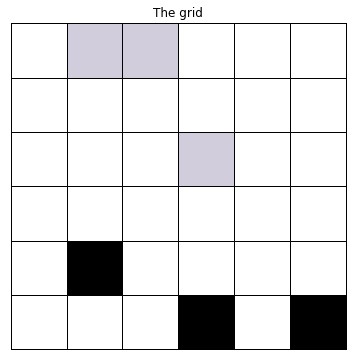

In [2]:
apartement = np.array ([
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [0, 0, 0, 2, 0, 2]
])

utils.draw_grid(apartement, mdp="Vaccum")

## Part (a) : MDP formulation

We propose the following MDP formulation: 

#### State space $\mathcal{S}$
The state space may be defined as follows. Let $$\mathcal{V} = \{\text{s = (s1, s2) } \in \mathbb{Z}^2 | 0 \leq s_i \leq 5\}$$ and `N = {1, 2, 3}` defines how dusty the part of `V` in the morning. Recall that the notation `N^V` denotes functions from `V` to `N`. Then `S = N^V` and each element of `s ∈ S` is a function `s = n(·)` taking vertices as inputs and dustiness ∈ `{1, 2, 3}` as output. We define the graph `G` by letting `V` be its vertices and drawing an edge between every adjacent vertex (we define adjacency by the coordinates of `S` differing by at most one entry by magnitude exactly `1`).

#### Action Space $\mathcal{A}$
The actions can now be written as:

$$As = \{\text{Paths over the graph } G \text{ that begin at (0, 0) and terminate at (0, 0) and visit every unclean point of } G\}$$

where a point `v` is unclean if `n(v) ≠ 1`.

$$\mathcal{As} = \lbrace \textrm{up, down, right, left, stay}\rbrace$$

#### Rewards $\mathcal{R}$

If the action `a` is a path, the rewards are:

$$r(s, a) = -\sum_{v \in a} \left( n(v) + \max\{\text{|occurrences of } v \text{ in } a| - 1, 0\} \right)$$

which is the negative total time spent cleaning the apartment. To be precise, the summation above treats `a` as a set and counts multiple occurrences of the same vertex once. Repeated visits are accounted for by the term containing the max.

The goal is to maximize:

$$E\pi\left[\sum_{t=0}^{89} r(s_t, a_t)\right]$$

Finally, the transitions are given by $$p(s'|s, a) = q(s')$$.
